In [1]:
# install import necessary libraries

import pandas as pd

import pandas as pd
import pickle

# Import the pickle file from google drive
from google.colab import drive
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer






In [2]:
# Mount the google drive to collab
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Cleaned Suicide Detection_v3.pkl'


# Open the pickle file in binary mode
with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Convert the loaded data into a DataFrame
df = pd.DataFrame(data)




In [ ]:
df.head()

,text,class,text_cleaned,len_text,len_text_cleaned,pos_tags,chunk_chink
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,former wife threatening suicide recently left ...,715,378,"[(former, JJ), (wife, NN), (threatening, VBG),...","[[(former, JJ), (wife, NN)], [(threatening, VB..."
1,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliment coming someone k...,138,94,"[(weird, JJ), (get, NN), (affected, JJ), (comp...","[[(weird, JJ), (get, NN)], [(affected, JJ), (c..."
2,Finally 2020 is almost over... So I can never ...,non-suicide,silence bad year ever swear fucking god annoying,129,48,"[(finally, RB), (2020, CD), (almost, RB), (sil...","[(finally, RB), (2020, CD), (almost, RB), [(si..."
3,i need helpjust help me im crying so hard,suicide,need help help cry,41,18,"[(need, NN), (help, NN), (help, VB), (cry, VB)...","[[(need, NN)], [(help, NN)], [(help, VB)], [(c..."
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,ism lost hello name struggling year ism past y...,2426,1369,"[(ism, NN), (lost, VBD), (hello, JJ), (name, N...","[[(ism, NN)], [(lost, VBD)], [(hello, JJ), (na..."


In [ ]:
from sklearn.model_selection import train_test_split



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'], df['class'], test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

print("Train\n", X_train.head(5))


print("\nValidation\n", X_val.head(5))


print("\nTest\n", X_test.head(5))


(139243,) (46415,) (46415,)
Train
 64811            salmon ling platoon trailer want pet right
26585     anyone geddit trouble logging geddit christ se...
87417     feeling silence think let suicide day born kne...
212624    autism valid reason kill autistic woman nobody...
56128     wish cowardice tendency end life think little ...
Name: text_cleaned, dtype: object

Validation
 30466     done shit come lesbian gay bisexual transsexua...
220635    dying scared always thought ending college fac...
135297    need advice hello life bad happy couple friend...
55524     hey everybody need editor help guy friend kind...
158304    want work anymore depressed suicidal decade ne...
Name: text_cleaned, dtype: object

Test
 74414     month harm free urge get every day day shit si...
149516    start becoming rich start company become affor...
12484     poem haiku game dev hello hello stop fucking s...
14043     honestly got no idea anymore feel everyone fak...
30673     ever cry think unfair life 

In [ ]:
 # Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.001)  # Set the minimum threshold to 1/1000
train_corpus = X_train.tolist()
val_corpus = X_val.tolist()
test_corpus = X_test.tolist()

#Fit and transform the training corpus using TF-IDF
X_train_tfidf = vectorizer.fit_transform(train_corpus)


# Transform the validation and test corpus using the learned vocabulary from training
X_val_tfidf = vectorizer.transform(val_corpus)
X_test_tfidf = vectorizer.transform(test_corpus)

# Convert the transformed data to DataFrames (optional)
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_val_tfidf = pd.DataFrame(X_val_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

df_y_train = y_train.to_frame()
df_y_val = y_val.to_frame()
df_y_test = y_test.to_frame()




print(df_train_tfidf.head(5))
print(df_val_tfidf.head(5))
print(df_test_tfidf.head(5))


   abandon  abandoned  abandonment  ability      able  abortion  abroad  \
0      0.0        0.0          0.0      0.0  0.000000       0.0     0.0   
1      0.0        0.0          0.0      0.0  0.000000       0.0     0.0   
2      0.0        0.0          0.0      0.0  0.000000       0.0     0.0   
3      0.0        0.0          0.0      0.0  0.000000       0.0     0.0   
4      0.0        0.0          0.0      0.0  0.162585       0.0     0.0   

   absence  absolute  absolutely  ...  younger  youth  youtu  youtube  \
0      0.0       0.0         0.0  ...      0.0    0.0    0.0      0.0   
1      0.0       0.0         0.0  ...      0.0    0.0    0.0      0.0   
2      0.0       0.0         0.0  ...      0.0    0.0    0.0      0.0   
3      0.0       0.0         0.0  ...      0.0    0.0    0.0      0.0   
4      0.0       0.0         0.0  ...      0.0    0.0    0.0      0.0   

   youtubealternative  zero  zoloft  zombie  zone  zoom  
0                 0.0   0.0     0.0     0.0   0.0   

In [ ]:

import pickle

df_train_tfidf.to_pickle('/content/drive/MyDrive/X_train_tfidf.pkl')
df_val_tfidf.to_pickle('/content/drive/MyDrive/X_val_tfidf.pkl')
df_test_tfidf.to_pickle('/content/drive/MyDrive/X_test_tfidf.pkl')

df_y_train.to_pickle('/content/drive/MyDrive/y_train.pkl')
df_y_test.to_pickle('/content/drive/MyDrive/y_test.pkl')
df_y_val.to_pickle('/content/drive/MyDrive/y_val.pkl')



In [3]:
import pickle

file_path_train = '/content/drive/MyDrive/X_train_tfidf.pkl'
file_path_val = '/content/drive/MyDrive/X_val_tfidf.pkl'
file_path_test = '/content/drive/MyDrive/X_test_tfidf.pkl'


# Import training TF-IDF vector
with open(file_path_train, 'rb') as file:
    data = pickle.load(file)
df_train_tfidf = pd.DataFrame(data)

# Import validation TF-IDF vector
with open(file_path_val, 'rb') as file:
    data = pickle.load(file)
df_val_tfidf = pd.DataFrame(data)

# Import test TF-IDF vector
with open(file_path_test, 'rb') as file:
    data = pickle.load(file)
df_test_tfidf = pd.DataFrame(data)






In [4]:
file_path_y_train = '/content/drive/MyDrive/y_train.pkl'
file_path_y_val = '/content/drive/MyDrive/y_val.pkl'
file_path_y_test = '/content/drive/MyDrive/y_test.pkl'


# Import training Y  data
with open(file_path_y_train, 'rb') as file:
    data = pickle.load(file)
df_y_train = pd.DataFrame(data)

# Import validation Y data
with open(file_path_y_val, 'rb') as file:
    data = pickle.load(file)
df_y_val = pd.DataFrame(data)

# Import test Y data
with open(file_path_y_test, 'rb') as file:
    data = pickle.load(file)
df_y_test = pd.DataFrame(data)


del data

In [5]:
X_train_tfidf = df_train_tfidf.values
X_val_tfidf = df_val_tfidf.values
X_test_tfidf = df_test_tfidf.values

y_train = df_y_train.values.ravel()
y_val = df_y_val.values.ravel()
y_test = df_y_test.values.ravel()


del df_train_tfidf
del df_val_tfidf
del df_test_tfidf

del df_y_train
del df_y_val
del df_y_test



In [ ]:
import gc
gc.collect()

0

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model training
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_tfidf)
probabilities = logreg.predict_proba(X_test_tfidf)



# Evaluation Test accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("LogisticRegression Accuracy:", accuracy)
print("LogisticRegression Classification Report:")
print(classification_report)


print("LogisticRegression Probabilities:")

print(probabilities.shape)
print(probabilities[0][0], probabilities[0][1])
print(probabilities[1][0], probabilities[1][1])




LogisticRegression Accuracy: 0.9257352149089734
LogisticRegression Classification Report:
              precision    recall  f1-score   support

 non-suicide       0.92      0.94      0.93     23248
     suicide       0.94      0.91      0.92     23167

    accuracy                           0.93     46415
   macro avg       0.93      0.93      0.93     46415
weighted avg       0.93      0.93      0.93     46415

LogisticRegression Probabilities:
(46415, 2)
0.061186760881276725 0.9388132391187233
0.7399892657082612 0.2600107342917388


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report

# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Fit the model to the training data
gbc.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test_tfidf)
probabilities = gbc.predict_proba(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("GradientBoostingClassifier Accuracy:", accuracy)
print("GradientBoostingClassifier Classification Report:")
print(classification_report)

print(probabilities.shape)
print(probabilities[0][0], probabilities[0][1])
print(probabilities[1][0], probabilities[1][1])

GradientBoostingClassifier Accuracy: 0.8739416137024669
GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

 non-suicide       0.84      0.92      0.88     23248
     suicide       0.91      0.83      0.87     23167

    accuracy                           0.87     46415
   macro avg       0.88      0.87      0.87     46415
weighted avg       0.88      0.87      0.87     46415

(46415, 2)
0.04733263824422518 0.9526673617557748
0.7906217809622658 0.20937821903773418


In [ ]:

gc.collect()

27

In [ ]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# Initialize the RandomForestClassifier with split criterian hyperparameter as default=gini
# choosing max_feature value (random feature split as ) None which is default
rf_1 = RandomForestClassifier()

# Fit the model to the training data
rf_1.fit(X_train_tfidf, y_train)



# Make predictions on the test data
y_pred_1 = rf_1.predict(X_test_tfidf)
probabilities_1 = rf_1.predict_proba(X_test_tfidf)

# Evaluate the model
accuracy_1 = accuracy_score(y_test, y_pred_1)
classification_report_1 = classification_report(y_test, y_pred_1)

print("RandomForestClassifier Accuracy:", accuracy_1)
print("RandomForestClassifier Classification Report:")
print(classification_report_1)

print(probabilities_1.shape)
print(probabilities_1[0][0], probabilities_1[0][1])
print(probabilities_1[1][0], probabilities_1[1][1])





RandomForestClassifier Accuracy: 0.8986749973069051
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

 non-suicide       0.91      0.88      0.90     23248
     suicide       0.89      0.91      0.90     23167

    accuracy                           0.90     46415
   macro avg       0.90      0.90      0.90     46415
weighted avg       0.90      0.90      0.90     46415

(46415, 2)
0.09 0.91
0.73 0.27


[0.03047334 0.02996375 0.02775211 0.02264863 0.02046358 0.01988804
 0.01947139 0.01390003 0.01368158 0.0129312 ]


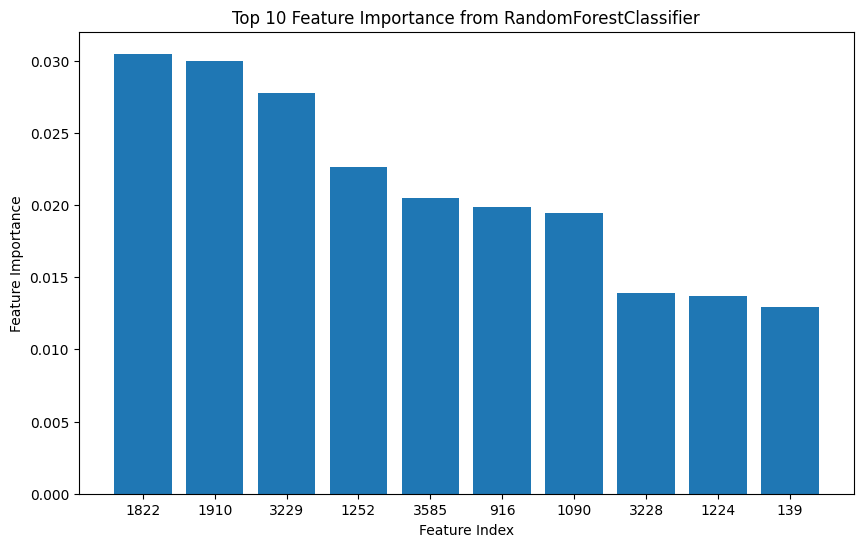

4152

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Get the feature inportance

feature_importance_1 = rf_1.feature_importances_

# Sort the features by importance in descending order and pick top 10


top_10_indices_1 = np.argsort(feature_importance_1)[::-1][:10]
top_10_importance_1 = feature_importance_1[top_10_indices_1]

print(top_10_importance_1)

#plot the feature importances using matplotlib

plt.figure(figsize=(10, 6))
plt.bar(range(10), top_10_importance_1, align="center")
plt.xticks(range(10), top_10_indices_1)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Top 10 Feature Importance from RandomForestClassifier")
plt.show()


gc.collect()

In [6]:
#Random classifier model with updated hyper params

# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize the RandomForestClassifier with split criterian as entropy
# choosing max_feature value (random feature split as ) sqrt which is good for classification problem
rf_2 = RandomForestClassifier(criterion='entropy', max_features='sqrt')


# Fit the model to the training data
rf_2.fit(X_train_tfidf, y_train)


# Make predictions on the test data
y_pred_2 = rf_2.predict(X_test_tfidf)
probabilities_2 = rf_2.predict_proba(X_test_tfidf)
print(rf_2.classes_)
print(rf_2.n_classes_)



# Make predictions on the val data
y_pred_val_2 = rf_2.predict(X_val_tfidf)
probabilities_2_val = rf_2.predict_proba(X_val_tfidf)


# Evaluate the model
accuracy_2 = accuracy_score(y_test, y_pred_2)
classification_report_2 = classification_report(y_test, y_pred_2)

print("RandomForestClassifier Accuracy:", accuracy_2)
print("RandomForestClassifier Classification Report:")
print(classification_report_2)

print(probabilities_2.shape)
print(probabilities_2[0][0], probabilities_2[0][1])
print(probabilities_2[1][0], probabilities_2[1][1])





['non-suicide' 'suicide']
2
RandomForestClassifier Accuracy: 0.899622966713347
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

 non-suicide       0.90      0.89      0.90     23248
     suicide       0.89      0.91      0.90     23167

    accuracy                           0.90     46415
   macro avg       0.90      0.90      0.90     46415
weighted avg       0.90      0.90      0.90     46415

(46415, 2)
0.09 0.91
0.78 0.22


[0.03073717 0.02751977 0.02492805 0.02378205 0.02102861 0.01916478
 0.0171329  0.0144751  0.01312423 0.01202177]


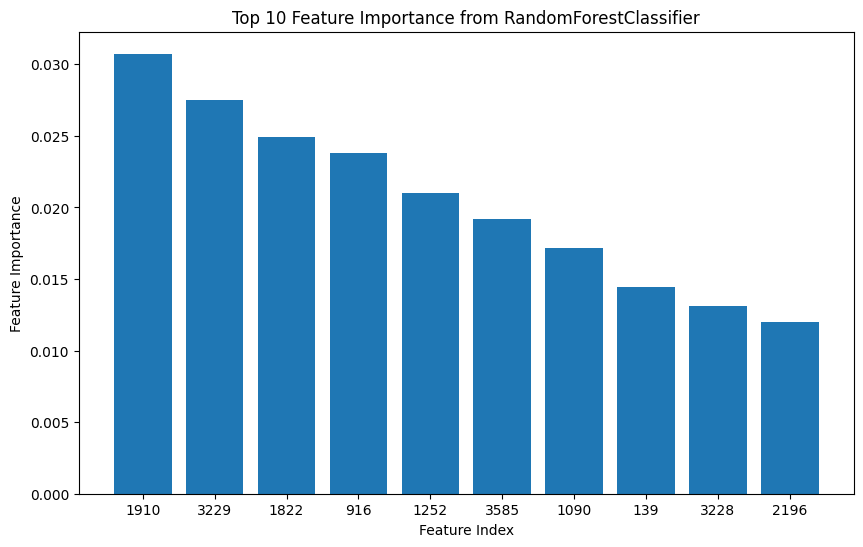

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Get the feature inportance

feature_importance_2 = rf_2.feature_importances_

# Sort the features by importance in descending order and pick top 10


top_10_indices_2 = np.argsort(feature_importance_2)[::-1][:10]
top_10_importance_2 = feature_importance_2[top_10_indices_2]

print(top_10_importance_2)

#plot the feature importances using matplotlib

plt.figure(figsize=(10, 6))
plt.bar(range(10), top_10_importance_2, align="center")
plt.xticks(range(10), top_10_indices_2)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Top 10 Feature Importance from RandomForestClassifier")
plt.show()




In [ ]:
#Random classifier model with updated hyper params

# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Initialize the RandomForestClassifier with split criterian as entropy
# choosing max_feature value (random feature split as ) sqrt which is good fro classification problem
rf_3 = RandomForestClassifier(criterion='entropy', max_features=0.2)


# Fit the model to the training data
rf_3.fit(X_train_tfidf, y_train)



# Make predictions on the test data
y_pred_3 = rf_3.predict(X_test_tfidf)
probabilities_3 = rf_3.predict_proba(X_test_tfidf)

# Evaluate the model
accuracy_3 = accuracy_score(y_test, y_pred_3)
classification_report_3 = classification_report(y_test, y_pred_3)

print("RandomForestClassifier Accuracy:", accuracy_3)
print("RandomForestClassifier Classification Report:")
print(classification_report_3)

print(probabilities_3.shape)
print(probabilities_3[0][0], probabilities_3[0][1])
print(probabilities_3[1][0], probabilities_3[1][1])





RandomForestClassifier Accuracy: 0.8929225465905418
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

 non-suicide       0.89      0.90      0.89     23248
     suicide       0.89      0.89      0.89     23167

    accuracy                           0.89     46415
   macro avg       0.89      0.89      0.89     46415
weighted avg       0.89      0.89      0.89     46415

(46415, 2)
0.01 0.99
0.88 0.12


[0.08962977 0.05685851 0.05322374 0.04666449 0.04232248 0.03707692
 0.02665895 0.02095362 0.02010236 0.01890916]


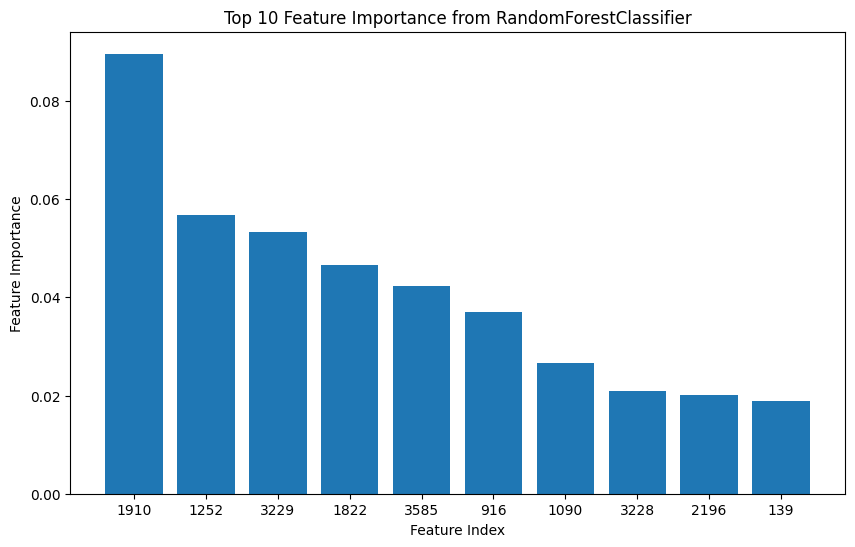

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Get the feature inportance

feature_importance_3 = rf_3.feature_importances_

# Sort the features by importance in descending order and pick top 10


top_10_indices_3 = np.argsort(feature_importance_3)[::-1][:10]
top_10_importance_3 = feature_importance_3[top_10_indices_3]

print(top_10_importance_3)

#plot the feature importances using matplotlib

plt.figure(figsize=(10, 6))
plt.bar(range(10), top_10_importance_3, align="center")
plt.xticks(range(10), top_10_indices_3)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Top 10 Feature Importance from RandomForestClassifier")
plt.show()


In [8]:
import numpy as np

filename = "/content/drive/MyDrive/probabilities_test.csv"
filename_val = "/content/drive/MyDrive/probabilities_val.csv"

# Use np.savetxt() to save the NumPy array to a CSV file
np.savetxt(filename, probabilities_2, delimiter=",")
np.savetxt(filename_val, probabilities_2_val, delimiter=",")